#  Providing Data-driven Suggestions for HR

This assignment is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

🗒
## Understand the business scenario and problem

The goals in this project are to analyze the data collected by the HR department and build a model that predicts whether or not an employee will leave the company. 

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## Load dataset

In [2]:
# Load dataset into a dataframe
### YOUR CODE HERE ### 
df0 = pd.read_csv("HR_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={"satisfaction_level":"SatisfactionLevel", "last_evaluation":"LastEvaluation", 
                                  "number_project":"NumberProject", "average_montly_hours":"AverageMonthlyHours",
                                 "time_spend_company":"tenure", "Work_accident":"WorkAccident", "left":"LeftCompany",
                                 "promotion_last_5years":"Promotion5years"})

# Display all column names after the update
df0.columns

Index(['SatisfactionLevel', 'LastEvaluation', 'NumberProject',
       'AverageMonthlyHours', 'tenure', 'WorkAccident', 'LeftCompany',
       'Promotion5years', 'Department', 'salary'],
      dtype='object')

## Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

SatisfactionLevel      0
LastEvaluation         0
NumberProject          0
AverageMonthlyHours    0
tenure                 0
WorkAccident           0
LeftCompany            0
Promotion5years        0
Department             0
salary                 0
dtype: int64

## Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.shape

(11991, 10)

## Check outliers

In [12]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25
print("value of iqr:", iqr)

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

value of iqr: 1.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

## Identify the types of models most appropriate for this task.

In [13]:
# creating a copy of the dataset
df1_cpy = df1.copy()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_department = le.fit_transform(df1_cpy['Department'])
encoded_department

array([7, 7, 7, ..., 4, 5, 0])

In [15]:
df1_cpy.drop("Department", axis=1, inplace=True)
df1_cpy["Department"] = encoded_department
df1_cpy

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,salary,Department
0,0.38,0.53,2,157,3,0,1,0,low,7
1,0.80,0.86,5,262,6,0,1,0,medium,7
2,0.11,0.88,7,272,4,0,1,0,medium,7
3,0.72,0.87,5,223,5,0,1,0,low,7
4,0.37,0.52,2,159,3,0,1,0,low,7
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,high,4
11996,0.74,0.95,5,266,10,0,0,1,high,4
11997,0.85,0.54,3,185,10,0,0,1,high,4
11998,0.33,0.65,3,172,10,0,0,1,high,5


In [16]:
encoded_salary = le.fit_transform(df1_cpy['salary'])
encoded_salary

array([1, 2, 2, ..., 0, 0, 1])

In [17]:
df1_cpy.drop("salary", axis=1, inplace=True)
df1_cpy["salary"] = encoded_department
df1_cpy

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,7
1,0.80,0.86,5,262,6,0,1,0,7,7
2,0.11,0.88,7,272,4,0,1,0,7,7
3,0.72,0.87,5,223,5,0,1,0,7,7
4,0.37,0.52,2,159,3,0,1,0,7,7
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,4
11996,0.74,0.95,5,266,10,0,0,1,4,4
11997,0.85,0.54,3,185,10,0,0,1,4,4
11998,0.33,0.65,3,172,10,0,0,1,5,5


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import  MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import imblearn.over_sampling as sm

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [20]:
#create a variable for all the models to be used
models = {'Random Forest':RandomForestClassifier(),
         'SVC': SVC(),
         'KNN':KNeighborsClassifier(),
         'Decision Tree':DecisionTreeClassifier(),
         'XGB':XGBClassifier(),
         'LR':LogisticRegression()}

In [21]:
X_copy = df1_cpy[["SatisfactionLevel", "AverageMonthlyHours","tenure", "WorkAccident", "Promotion5years", "Department","salary"]]
y_copy = df1_cpy[["LeftCompany"]]

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X_copy,y_copy,test_size=0.3,random_state=45)

In [23]:

    cv_scores =[]
    for model in  models.values():
        kf = KFold(n_splits=6,shuffle=True,random_state=42)
        cv_result = cross_val_score(model,X_train,Y_train,cv=kf,n_jobs=-1)
        cv_scores.append(cv_result)

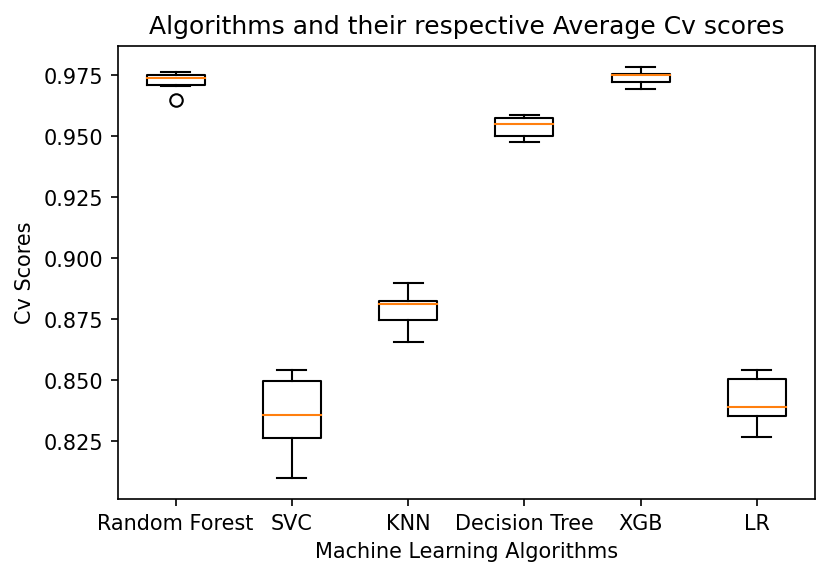

In [24]:
plt.figure(dpi=150)
plt.title('Algorithms and their respective Average Cv scores')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Cv Scores')
plt.boxplot(cv_scores,labels=models.keys())
plt.show()

In [25]:
#setting up a function to fit and score a model
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different sickit learning models
    x_train:training data (no labels)
    y_train:training dat (labels)
    x_test: testing data (no labels)
    y_test: testing data (labels)
    """
    
    #making a dictionary to keep model scores 
    model_scores = {}
    
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(X_train, Y_train)
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    
    return(model_scores)

In [26]:
%%time
scores = fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          Y_train=Y_train,
                          Y_test=Y_test)

scores

C:\Users\USER\AppData\Local\Temp\ipykernel_13536\3018388249.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


CPU times: total: 6.53 s
Wall time: 4.09 s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.9705391884380211,
 'SVC': 0.830461367426348,
 'KNN': 0.8891050583657587,
 'Decision Tree': 0.9574763757643135,
 'XGB': 0.9697053918843802,
 'LR': 0.8443579766536965}

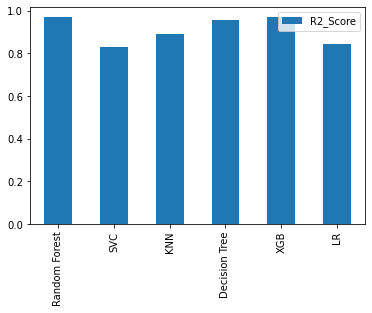

In [27]:
# compare models using charts
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar();

From the above boxplot and barchart, we could say that Xgboost, Random Forest, Decision Tree performed cosistently the most. They have the highest median value in the boxplot.

But since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.



# Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

Encode the categorical variables.

In [28]:
# Encode categorical variables
df2 = pd.get_dummies(df1)

Isolate the outcome variable.

In [29]:
# Isolate the outcome variable
y = df2['LeftCompany']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: LeftCompany, dtype: int64

Select the features. 

In [30]:
# Select the features
X = df2.drop('LeftCompany', axis=1)

# Display the first few rows of `X`
X.head()

,SatisfactionLevel,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,Promotion5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Split the data into training, validating, and testing sets.

In [31]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

## Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [32]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [33]:
%%time
tree1.fit(X_tr, y_tr)

CPU times: total: 3.22 s
Wall time: 3.21 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'precision', 'f1'})

Identify the optimal values for the decision tree parameters.

In [34]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [35]:
# Check best AUC score on CV
tree1.best_score_

0.9703634179699269

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search. 

In [36]:
def make_results(model_name:str, model_object, metric:str):
  '''
  Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, accuracy, or auc
  
  Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
  for the model with the best mean 'metric' score across all validation folds.  
  '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
  metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

  # Get all the results from the CV and put them in a dataframe
  cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the dataframe with the max(metric) score
  best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
  auc = best_estimator_results.mean_test_roc_auc
  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy
  
  # Create table of results
  table = pd.DataFrame()
  table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
  return table

Use the function just defined to get all the scores from grid search.

In [37]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

C:\Users\USER\AppData\Local\Temp\ipykernel_13536\2133317035.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

## Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [38]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [39]:
%%time
rf1.fit(X_tr, y_tr) # --> Wall time: ~22min

CPU times: total: 18min 58s
Wall time: 18min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'precision', 'f1'})

Specify path to where you want to save your model.

In [40]:
# Define a path to the folder where you want to save the model
path = "C:\\Users\\USER\\Desktop\\afro fem class\\Copy of Assignment6_Exemplar.ipynb"

Define functions to pickle the model and read in the model.

In [41]:
import pickle
import io

In [42]:
def write_pickle(path, model_object, save_as:str):
  '''
  In: 
    path:         path of folder where you want to save the pickle
    model_object: a model you want to pickle
    save_as:      filename for how you want to save the model

  Out: A call to pickle the model in the folder indicated
  '''    

  with open(path + save_as + '.pickle', 'wb') as to_write:
    pickle.dump(model_object, to_write)

In [43]:
def read_pickle(path, saved_model_name:str):
  '''
 In: 
    path:             path to folder where you want to read from
    saved_model_name: filename of pickled model you want to read in

  Out: 
    model: the pickled model 
  '''
  with open(path + saved_model_name + '.pickle', 'rb') as to_read:
    model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [44]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [45]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [46]:
# Check best AUC score on CV
rf1.best_score_

0.9795790967836983

Identify the optimal values for the parameters of the random forest model.

In [47]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [48]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.970363   0.922167  0.921337  0.921719  0.974007
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.979579   0.943576  0.923021  0.933145  0.978037


C:\Users\USER\AppData\Local\Temp\ipykernel_13536\2133317035.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model outperforms the decision tree model.

Next, you can evaluate these models on the validation set.

Define a function that gets all the scores from a model's predictions.

In [49]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
  '''
  Generate a table of test scores.

  In: 
    model_name (string):  How you want your model to be named in the output table
    model:                A fit GridSearchCV object
    X_test_data:          numpy array of X_test data
    y_test_data:          numpy array of y_test data

  Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
  '''

  preds = model.best_estimator_.predict(X_test_data)

  auc = round(roc_auc_score(y_test_data, preds), 3)
  accuracy = round(accuracy_score(y_test_data, preds), 3)
  precision = round(precision_score(y_test_data, preds), 3)
  recall = round(recall_score(y_test_data, preds), 3)
  f1 = round(f1_score(y_test_data, preds), 3)

  table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
  return table

Apply the function defined above to get scores for the decision tree model and the random forest model. 

In [50]:
# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)

# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


On the validation set, the random forest model outperforms the decision tree model across most metrics.

Now use the best performing model to predict on the test set.

In [51]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.955,0.961,0.917,0.938,0.98


The test scores are kind of similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

## Feature Engineering

One might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train a model that should not be used during training, either because it appears in the test data or because it's not data that you expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided to quit, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

Here we would drop the `satisfaction_level` feature and create a new feature that roughly captures whether an employee is overworked. This new feature will be called `overworked`. It will be a binary variable.

In [52]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df3 = df1.drop('SatisfactionLevel', axis=1)

# Display first few rows of new dataframe
df3.head()

,LastEvaluation,NumberProject,AverageMonthlyHours,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


In [53]:
# Create `overworked` column from the average monthly hours feature.
df3['overworked'] = df3['AverageMonthlyHours']

# Inspect max and min average monthly hours values
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is the approximate average number of monthly hours for someone who works 50 weeks per year, 5 days per week, and 8 hours per day. 

Define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, we would reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [54]:
# Define `overworked` as working > 175 hrs/week
df3['overworked'] = (df3['overworked'] > 175).astype(int)

# Display first few rows of new column
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Drop the `average_monthly_hours` column.



In [55]:
# Drop the `average_monthly_hours` column
df3 = df3.drop('AverageMonthlyHours', axis=1)

# Display first few rows of resulting dataframe
df3.head()

,LastEvaluation,NumberProject,tenure,WorkAccident,LeftCompany,Promotion5years,Department,salary,overworked
0,0.53,2,3,0,1,0,sales,low,0
1,0.86,5,6,0,1,0,sales,medium,1
2,0.88,7,4,0,1,0,sales,medium,1
3,0.87,5,5,0,1,0,sales,low,1
4,0.52,2,3,0,1,0,sales,low,0


Start by one-hot encoding the categorical variables as needed.

In [56]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df4 = pd.get_dummies(df3)

# Display the new dataframe
df4.head()

,LastEvaluation,NumberProject,tenure,WorkAccident,LeftCompany,Promotion5years,overworked,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Isolate the outcome variable.

In [57]:
# Isolate the outcome variable
y = df4['LeftCompany']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: LeftCompany, dtype: int64

Select the features. 

In [58]:
# Select the features
X = df4.drop('LeftCompany', axis=1)

# Display the first few rows of `X`
X.head()

,LastEvaluation,NumberProject,tenure,WorkAccident,Promotion5years,overworked,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Split the data into training, validating, and testing sets.

In [59]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 2

In [60]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [61]:
%%time
tree2.fit(X_tr, y_tr)

CPU times: total: 2.45 s
Wall time: 2.45 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'precision', 'f1'})

In [62]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [63]:
# Check best AUC score on CV
tree2.best_score_

0.9534827790328492

This model performs very well, even without satisfaction levels and detailed hours worked data. 

Next, check the other scores.

In [64]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
tree2_cv_results

C:\Users\USER\AppData\Local\Temp\ipykernel_13536\2133317035.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree2 cv,0.953483,0.864826,0.902098,0.883024,0.960245


Some of the other scores( like Precision and F1) fell. This is to be expected given that fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Round 2

In [65]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [66]:
%%time
rf2.fit(X_tr, y_tr) # --> Wall time: 17min 5s

CPU times: total: 13min 49s
Wall time: 13min 49s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'roc_auc', 'precision', 'f1'})

In [67]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [68]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [69]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [70]:
# Check best AUC score on CV
rf2.best_score_

0.9656664586139387

In [71]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree2 cv  0.953483   0.864826  0.902098  0.883024  0.960245
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.965666   0.909473  0.879506  0.894049  0.965388


C:\Users\USER\AppData\Local\Temp\ipykernel_13536\2133317035.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


Again, the scores dropped slightly, but the random forest performs better than the decision tree. 

Test the models on the validation set now.

In [72]:
# Collect validation scores 
tree2_val_results = get_scores('decision tree2 val', tree2, X_val, y_val)
rf2_val_results = get_scores('random forest2 val', rf2, X_val, y_val)

# Concatenate validation scores into table
all_val_results2 = [tree2_val_results, rf2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

,model,AUC,precision,recall,f1,accuracy
0,decision tree2 val,0.942,0.883,0.907,0.895,0.965
0,random forest2 val,0.933,0.905,0.884,0.895,0.965


It appears that the random forest performs slightly better than the decision tree, across most of the evaluation metrics.

Use this random forest model to predict on the test set now.

In [73]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest2 test,0.935,0.898,0.889,0.894,0.965


✏
##Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






This seems to be a stable, well-performing final model. 



#### Plot a confusion matrix to visualize how well it predicts on the test set.

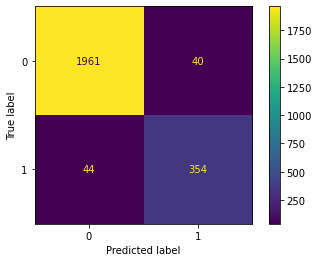

In [74]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot();

The model predicts more false negatives(44) than false positives(40), which means that some employees may be identified as at risk of not leaving, when that's actually not the case. ie these employees may be at risk of quitting or being fired. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

In [75]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, preds, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2001
    Predicted would leave       0.90      0.89      0.89       398

                 accuracy                           0.96      2399
                macro avg       0.94      0.93      0.94      2399
             weighted avg       0.96      0.96      0.96      2399



#### Decision tree splits

In [76]:
from sklearn.tree import plot_tree

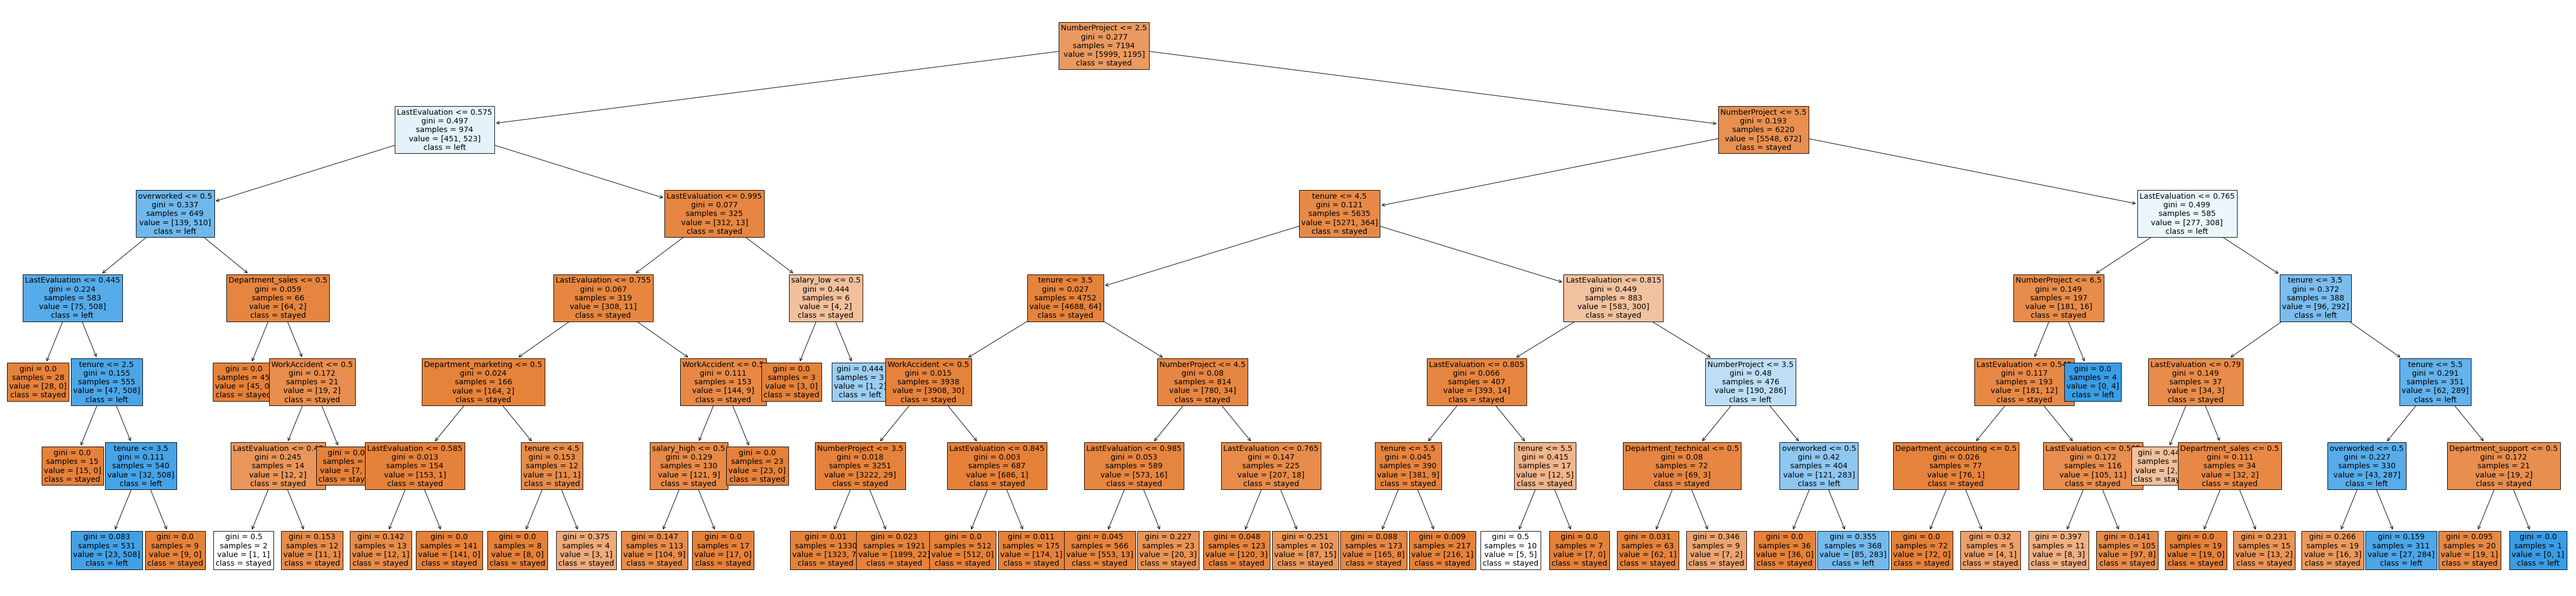

In [77]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [78]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
NumberProject,0.381767
LastEvaluation,0.353482
tenure,0.169771
overworked,0.091517
Department_support,0.001099
salary_low,0.000853
Department_technical,0.000429
Department_sales,0.000357
WorkAccident,0.000282
Department_accounting,0.000239


You can then create a barplot to visualize the decision tree feature importances.

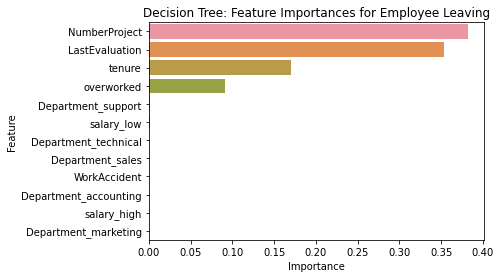

In [79]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `LastEvaluation`, `NumberProject`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `LeftCompany`.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

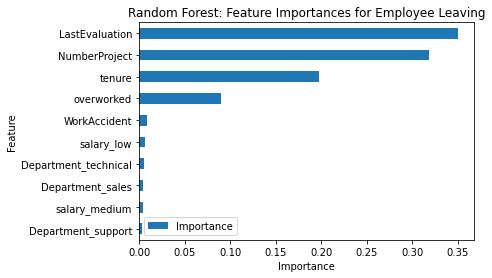

In [80]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `LastEvaluation`, `NumberProject`, `tenure`, `overworked`, `WorkAccident`, and `salary_low` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `LeftCompany`.

### Summary of model results

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 94.3%, precision of 86.5%, recall of 91.5%, f1-score of 88.9%, and accuracy of 96.2%, on the test set. The random forest modelslightly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 